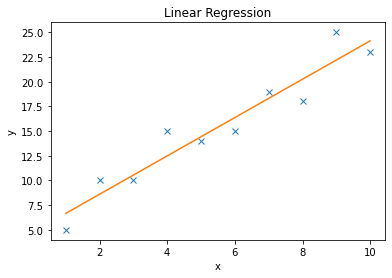

m = [1.93939394] 
b = [4.73333333]


In [1]:
# Fitting Linear Regression line to a set of X, Y data points

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:,:-1]
Y = df.values[:, -1]

fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten() #gradient of fitted line
b = fit.intercept_.flatten() #y-intercept of fitted line

plt.plot(X, Y, 'x')
plt.plot(X, m*X + b)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

print('m = {0} \nb = {1}'.format(m, b))

In [2]:
# Finding the residuals/errors for the fitted line & data points

import pandas as pd

points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples() #import points

m = 1.9394
b = 4.7333

sum_of_squares = 0  #declare sum of squares value before looping

for p in points:
    y_actual = p.y
    y_predicted = m*p.x + b
    residual = y_actual - y_predicted
    residual_squared = (y_actual - y_predicted)**2
    print('Residual error {0}: {1}'.format(p, residual))
    # Finding the sum of squares for the residuals/error values above
    sum_of_squares += residual_squared
    
print('Sum of squared of residuals = {0}'.format(sum_of_squares))

Residual error Pandas(Index=0, x=1, y=5): -1.6726999999999999
Residual error Pandas(Index=1, x=2, y=10): 1.3879000000000001
Residual error Pandas(Index=2, x=3, y=10): -0.5515000000000008
Residual error Pandas(Index=3, x=4, y=15): 2.5091
Residual error Pandas(Index=4, x=5, y=14): -0.430299999999999
Residual error Pandas(Index=5, x=6, y=15): -1.3697000000000017
Residual error Pandas(Index=6, x=7, y=19): 0.6908999999999992
Residual error Pandas(Index=7, x=8, y=18): -2.2485
Residual error Pandas(Index=8, x=9, y=25): 2.812100000000001
Residual error Pandas(Index=9, x=10, y=23): -1.1272999999999982
Sum of squared of residuals = 28.096969700000006


In [3]:
# Finding the best fit line by finding the best m and b values producing the minimum sum of squares.
# The lower the Sum of Squares of residuals -> the better the fit -> essentially Minimising the Loss function.
# Several Optimization techniques: 
    # 1) Closed Form Equation; 
    # 2) Matrix Inversion;
    # 3)Matrix Decomposition; 
    # 4) Gradient Descent; 
    # 5) Stochastic Gradient Descent

In [4]:
# 1) Closed Form Equation
# Suitable for a Simple Linear regression with one input and one output variable
# Tend not to scale well, especially with larger datasets
# Equation for m & b derived from Calculus

import pandas as pd

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()) #import points

n = len(points)
print('Total no. of items: {0}'.format(n))

m = ((n * sum(p.x * p.y for p in points) - ((sum(p.x for p in points) * sum(p.y for p in points))))) / ((n * sum(p.x ** 2 for p in points)) - (sum(p.x for p in points)**2))
    
b = (sum(p.y for p in points) / n) - m*(sum(p.x for p in points) / n)

print('m = {0} \nb = {1}'.format(m ,b))

Total no. of items: 10
m = 1.9393939393939394 
b = 4.7333333333333325


In [5]:
# 2) Matrix Inversion

import pandas as pd
import numpy as np
from numpy.linalg import inv

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:, :-1].flatten()
Y = df.values[:, -1]

# Adding placeholder 1s column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)

print('Matrix Inversion technique yields \n[m  b] : {0}'.format(b))

Matrix Inversion technique yields 
[m  b] : [1.93939394 4.73333333]


In [6]:
# 3) Matrix Decomposition (QR Decomposition)
# QR Decomposition copes with large amounts of data well and exhibits Numerical stability in minimising errors in approximations

import pandas as pd
import numpy as np
from numpy.linalg import inv, qr

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:, :-1].flatten()
Y = df.values[:, -1]

# Adding placeholder 1s column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Calcuulate coefficients of Slope m and Intercept b using QR decomposition
Q, R = qr(X_1)
b = inv(R) @ (Q.transpose() @ Y)

print('Matrix QR Decomposition technique yields \n[m  b] : {0}'.format(b))

Matrix QR Decomposition technique yields 
[m  b] : [1.93939394 4.73333333]


Derivative of function (x - 3)**2 + 4 is 2*x - 6
Value of x with minimal gradient after 100000 iterations: 3.0000000000000107 
Value of f(x) at x value above: 4.0
Value of gradient at x value above: 2.1316282072803006e-14


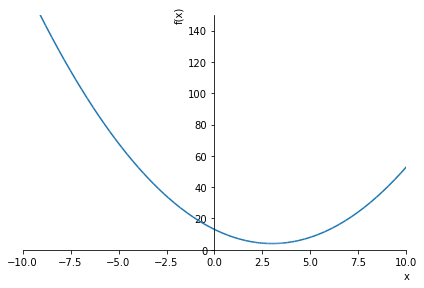

In [7]:
# 4) Gradient Descent part 1

# Testing the concept of Gradient Descent by finding value of x with gradient very close to zero for f(x)=(x-3)**2 + 4

import random
from sympy import *

x = symbols('x')
function = (x-3)**2 + 4
deriv_func = diff(function)
print('Derivative of function {0} is {1}'.format(function, deriv_func))

def f(x): 
    return (x-3)**2 + 4

def dx_f(x):
    return 2*x - 6

# set Learning rate value, a learning rate of 0.01 with 100,000 iterations is slightly better than 0.001 with 100,000 iterations
L = 0.01

# set no. of iterations to perform
Iterations = 100000

# start at a random x value
x = random.randint(-15,20)

for i in range(Iterations):
    slope = dx_f(x)
    x = x - (L*slope)
    
print('Value of x with minimal gradient after {0} iterations: {1} \nValue of f(x) at x value above: {2}'.format(Iterations, x, f(x)))
print('Value of gradient at x value above: {0}'.format(slope))

# plot the function to see whether above is true
plot(function, xlim=(-10, 10), ylim=(0,150))

Final result of optimized Linear Regression model function : 
f(x) = 1.9393939393939548x + 4.733333333333227


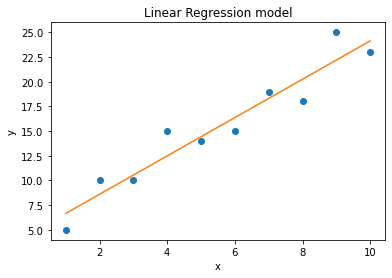

In [8]:
# 4) Gradient Descent part 2

# Gradient Descent for a Linear Regression using 'https://bit.ly/3goOAnt' dataset

import pandas as pd
import matplotlib.pyplot as plt

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples())
n = float(len(points)) #no. of elements in X

# setting the initial conditions & datatype
m = 0.0
b = 0.0

L = 0.001
iterations = 100000

# the gradient descent formula

for i in range(iterations):
    dm_f = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    db_f = sum(2 * ((m * p.x + b) - p.y) for p in points)
    m = m - L*dm_f
    b = b - L*db_f
    
print('Final result of optimized Linear Regression model function : \nf(x) = {0}x + {1}'.format(m, b))

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')
X = df.values[:, :-1]
Y = df.values[:, -1]

plt.plot(X, Y, 'o')
plt.plot(X, m*X + b)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression model')
plt.show()